In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


1. Load the mushroom dataset

In [34]:
import pandas as pd

# Load the mushroom dataset
df = pd.read_csv("mushrooms.csv")


In [36]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,NaN,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      4596 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Encode categorical variables into numerical values.

In [44]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
mushroom_data_encoded = df.apply(label_encoder.fit_transform)


Split the dataset into features (X) and target variable (y), then further split it into training and testing sets.

In [46]:
# Split the dataset into features (X) and target variable (y)
X = mushroom_data_encoded.drop('class', axis=1)
y = mushroom_data_encoded['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a machine learning classifier on the training data. We'll use a Random Forest classifier.

In [47]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate the trained model on the testing data.

In [49]:
# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 1.0


In [51]:
# Display classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



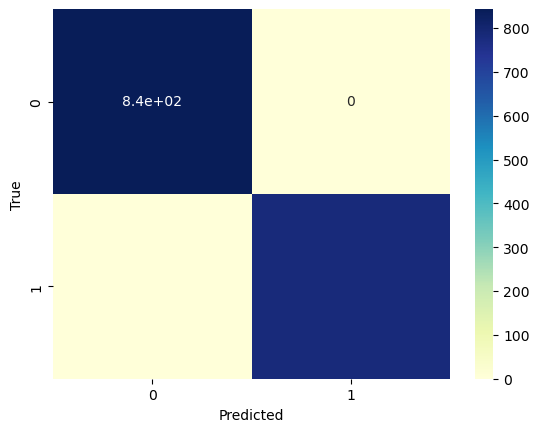

In [52]:
# Display confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()